# Resampling for Model Validation

In [1]:
suppressPackageStartupMessages({
  library(knitr)
  library(readr)
  library(ggplot2)
  library(tidyverse)
  library(car)
  library(caret)
  library(pscl)
  library(boot)
})

### Objective
As public figures from film and television have increasingly  transitioned to political careers in various levels of government. This trend raises questions as to what attributes contribute to an actor's electoral success. Career longevity, accolades, acting credits, and family connections may further enhance an actor's publicity and increase perceived credinility.

This study aims to apply bootstrap and jackknife resampling techniques to identify if career length (in years), number of acting credits, number of awards, and number of immediate family members in politiics are significantly associated with actors becoming elected politicians.Logistic regression modeling will be used to estimate the strength and direction these predictors while assessing model stability under resampling.

In [2]:
actors <- read_csv("https://raw.githubusercontent.com/zkdlyn/APM1210_SA2/refs/heads/main/celebrity_sample30.csv",
show_col_types = FALSE)

head(actors,5)

name,years_active,imdb_credits,family,education,politics,wins
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sam Milby,20,60,0,0,0,0
Daniel Padilla,15,34,1,0,0,1
Nadine Lustre,24,47,0,1,0,5
Bea Alonzo,23,51,0,1,0,0
Alden Richards,14,55,0,1,0,0


In [3]:
summary(actors)

     name            years_active   imdb_credits        family      
 Length:30          Min.   :13.0   Min.   : 15.00   Min.   :0.0000  
 Class :character   1st Qu.:21.5   1st Qu.: 47.50   1st Qu.:0.0000  
 Mode  :character   Median :29.0   Median : 59.50   Median :0.5000  
                    Mean   :30.9   Mean   : 69.00   Mean   :0.8667  
                    3rd Qu.:39.0   3rd Qu.: 85.75   3rd Qu.:1.0000  
                    Max.   :54.0   Max.   :151.00   Max.   :4.0000  
   education        politics        wins      
 Min.   :0.000   Min.   :0.0   Min.   :0.000  
 1st Qu.:1.000   1st Qu.:0.0   1st Qu.:0.000  
 Median :2.000   Median :0.0   Median :0.000  
 Mean   :1.733   Mean   :0.4   Mean   :1.433  
 3rd Qu.:2.000   3rd Qu.:1.0   3rd Qu.:2.000  
 Max.   :3.000   Max.   :1.0   Max.   :9.000  

**Initial Logistic Regression Model**

$$
ln \frac{p}{1-p}= \beta_0 + \beta_1 \cdot (\text{years\_active}) + \beta_2 \cdot (\text{imdb\_credits}) + \beta_3 \cdot (\text{family}) + \beta_4 \cdot (\text{wins})

$$

This formula models the log-odds of an actor becoming an elected politician as a linear combination of four predictors:  years_active, imdb_credits, family and wins.

In [22]:
logit <- glm(politics~ years_active + imdb_credits + family+wins, 
             data = actors, family = binomial)




Call:  glm(formula = politics ~ years_active + imdb_credits + family + 
    wins, family = binomial, data = actors)

Coefficients:
 (Intercept)  years_active  imdb_credits        family          wins  
     -2.4644        0.1399       -0.0364        1.3355       -1.0366  

Degrees of Freedom: 29 Total (i.e. Null);  25 Residual
Null Deviance:	    40.38 
Residual Deviance: 23.38 	AIC: 33.38

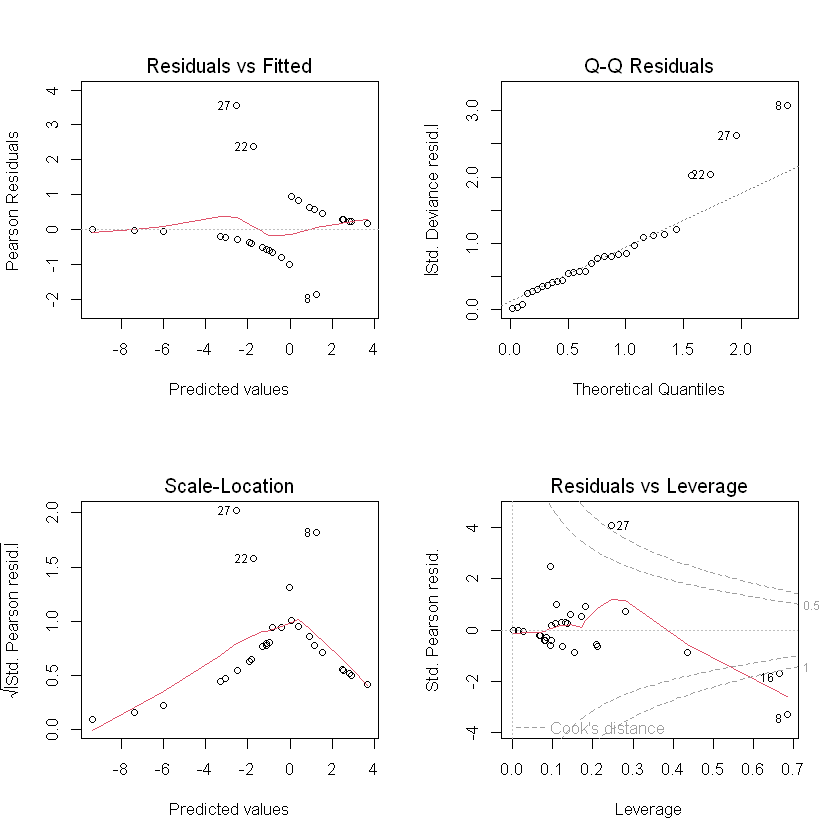

In [24]:
logit
par(mfrow=c(2,2))
plot(logit)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:  glm(formula = politics ~ years_active + imdb_credits + family + 
    wins, family = binomial, data = actors_x)

Coefficients:
 (Intercept)  years_active  imdb_credits        family          wins  
    -2.62973       0.13870      -0.04809      20.93615     -19.17130  

Degrees of Freedom: 27 Total (i.e. Null);  23 Residual
Null Deviance:	    37.52 
Residual Deviance: 8.88 	AIC: 18.88

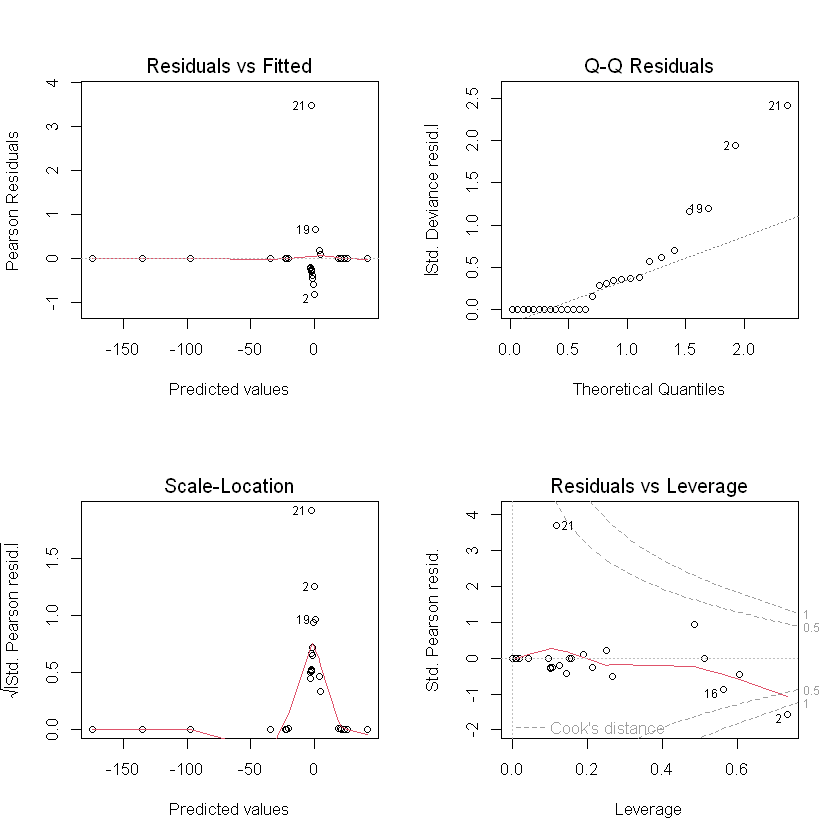

In [21]:
actors_x <- actors[-c(8, 27),]

logit_2 <- glm(politics~ years_active + imdb_credits + family+wins, 
             data = actors_x, family = binomial)
logit_2
par(mfrow = c(2, 2))
plot(logit_2)

In [25]:
set.seed(1234)
B<- 100
n <- nrow(actors)
accuracies <- numeric(B)

for (b in 1:B){
  i <- sample(1:n, size=n,replace=TRUE)
  sample.bs <- actors[i, ]

  logit.bs <- suppressWarnings(glm(politics ~ years_active + family, 
                  data = sample.bs, family = binomial))
  
  prob <- predict(logit.bs, newdata = actors, type="response")
  pred <- ifelse(prob > 0.5, 1, 0)
  accuracy <- mean(pred==actors$politics)
  accuracies[b]<- accuracy
}

mean(accuracies)

[1] 0.7303333

In [26]:
set.seed(1234)
B<- 100
n <- nrow(actors_x)
accuracies <- numeric(B)

for (b in 1:B){
  i <- sample(1:n, size=n,replace=TRUE)
  sample.bs <- actors_x[i, ]

  logit.bs <- suppressWarnings(glm(politics ~ years_active + family, 
                  data = sample.bs, family = binomial))
  
  prob <- predict(logit.bs, newdata = actors_x, type="response")
  pred <- ifelse(prob > 0.5, 1, 0)
  accuracy <- mean(pred==actors_x$politics)
  accuracies[b]<- accuracy
}

mean(accuracies)

[1] 0.8135714